In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Personalized_Diet_Recommendations.csv')
data.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,None,175,75,219,...,105,179,143,Western,None,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,None,155,72,208,...,69,315,75,Mediterranean,None,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,None,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,None,148,91,258,...,135,371,120,Western,None,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [4]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Patient_ID', 'Gender', 'Chronic_Disease', 'Genetic_Risk_Factor', 'Allergies', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits', 'Preferred_Cuisine', 'Food_Aversions', 'Recommended_Meal_Plan'] 



,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,None,175,75,219,...,105,179,143,Western,None,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,None,155,72,208,...,69,315,75,Mediterranean,None,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,None,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,None,148,91,258,...,135,371,120,Western,None,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [5]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
       'Chronic_Disease', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level',
       'Genetic_Risk_Factor', 'Allergies', 'Daily_Steps', 'Exercise_Frequency',
       'Sleep_Hours', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake',
       'Preferred_Cuisine', 'Food_Aversions', 'Recommended_Calories',
       'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats',
       'Recommended_Meal_Plan'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           5000 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 5000 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [7]:
columns_to_drop = ['Patient_ID','Preferred_Cuisine', 'Food_Aversions', 'Recommended_Meal_Plan','Recommended_Calories',
       'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats']

In [8]:
data.drop(columns=columns_to_drop, inplace=True)

In [9]:
data.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Chronic_Disease',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Level', 'Blood_Sugar_Level', 'Genetic_Risk_Factor',
       'Allergies', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake',
       'Fat_Intake'],
      dtype='object')

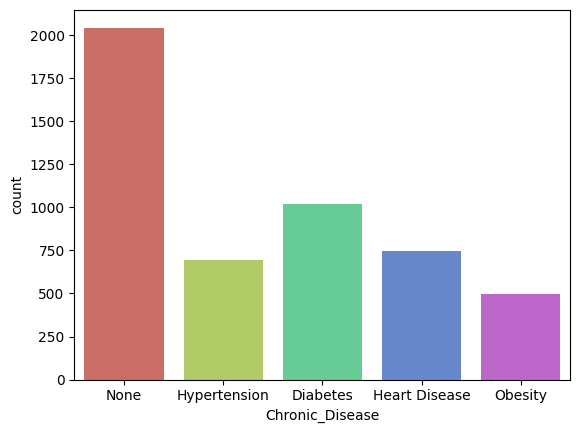

In [10]:
sns.countplot(x='Chronic_Disease',data=data, palette='hls')
plt.show()

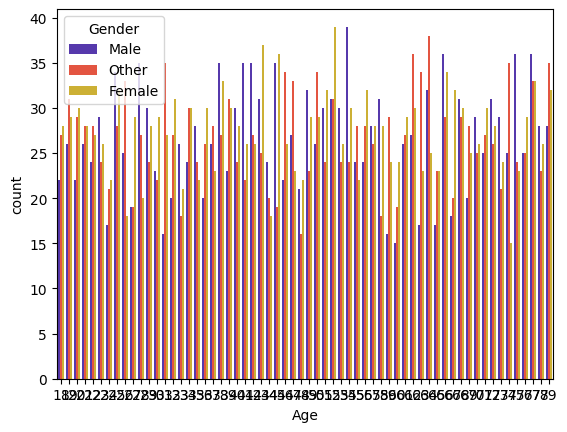

In [11]:
sns.countplot(x='Age',hue='Gender',data=data, palette='CMRmap')
plt.show()

In [12]:
data['Chronic_Disease'].value_counts()

None             2043
Diabetes         1019
Heart Disease     749
Hypertension      693
Obesity           496
Name: Chronic_Disease, dtype: int64

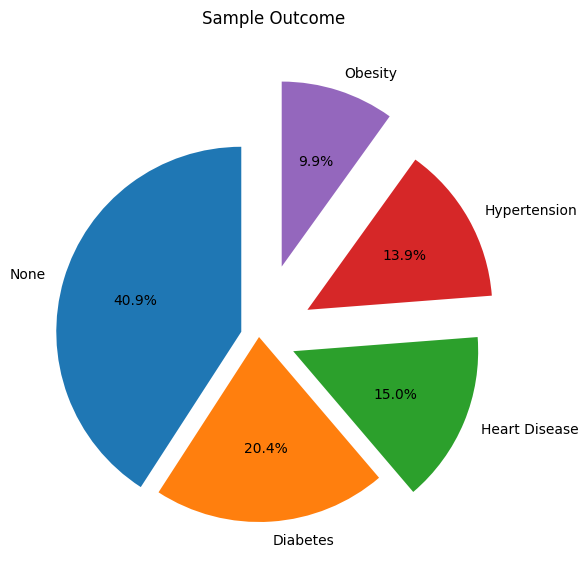

In [13]:
target = data['Chronic_Disease'].value_counts()
labels = ['None','Diabetes','Heart Disease','Hypertension','Obesity']
sizes = [target[0], target[1],target[2], target[3],target[4]]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%',
        startangle=90,  explode =[0.1, 0, 0.2,0.3,0.4])
plt.title('Sample Outcome')
plt.axis('equal')
plt.tight_layout()
plt.show()

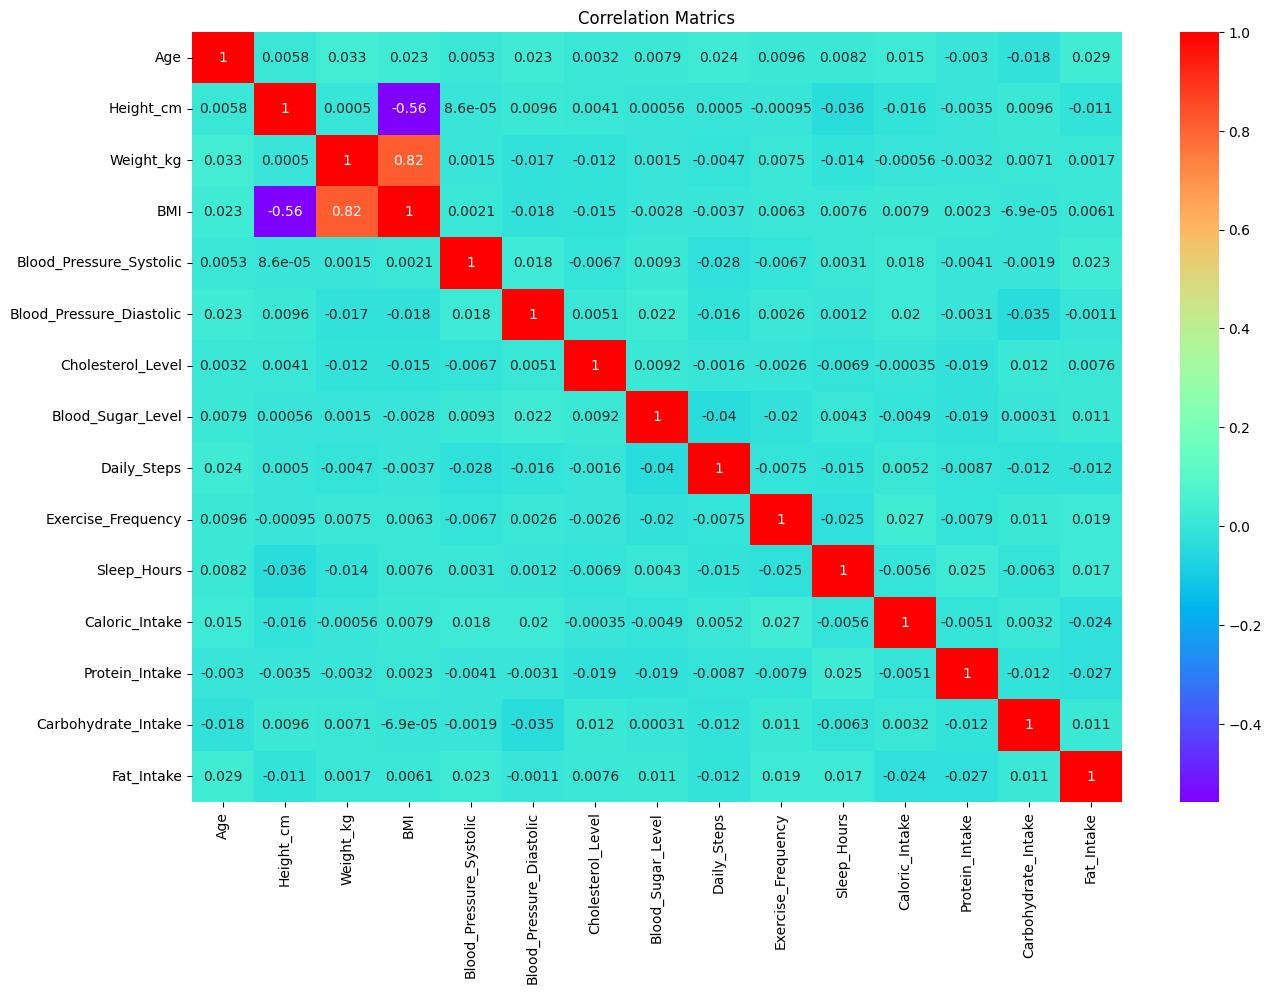

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.title('Correlation Matrics')
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Gender                    5000 non-null   object 
 2   Height_cm                 5000 non-null   int64  
 3   Weight_kg                 5000 non-null   int64  
 4   BMI                       5000 non-null   float64
 5   Chronic_Disease           5000 non-null   object 
 6   Blood_Pressure_Systolic   5000 non-null   int64  
 7   Blood_Pressure_Diastolic  5000 non-null   int64  
 8   Cholesterol_Level         5000 non-null   int64  
 9   Blood_Sugar_Level         5000 non-null   int64  
 10  Genetic_Risk_Factor       5000 non-null   object 
 11  Allergies                 5000 non-null   object 
 12  Daily_Steps               5000 non-null   int64  
 13  Exercise_Frequency        5000 non-null   int64  
 14  Sleep_Ho

In [16]:
data.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Chronic_Disease',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Level', 'Blood_Sugar_Level', 'Genetic_Risk_Factor',
       'Allergies', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake',
       'Fat_Intake'],
      dtype='object')

In [17]:
data = data[['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Level', 'Blood_Sugar_Level', 'Genetic_Risk_Factor',
       'Allergies', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake',
       'Fat_Intake','Chronic_Disease']]

In [18]:
data.to_csv('processed.csv')

In [19]:
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

Categorical columns: ['Gender', 'Genetic_Risk_Factor', 'Allergies', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits', 'Chronic_Disease'] 



In [20]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Genetic_Risk_Factor']= label_encoder.fit_transform(data['Genetic_Risk_Factor'])
data['Allergies']= label_encoder.fit_transform(data['Allergies'])
data['Alcohol_Consumption']= label_encoder.fit_transform(data['Alcohol_Consumption'])
data['Smoking_Habit']= label_encoder.fit_transform(data['Smoking_Habit'])
data['Dietary_Habits']= label_encoder.fit_transform(data['Dietary_Habits'])
data['Chronic_Disease']= label_encoder.fit_transform(data['Chronic_Disease'])

In [21]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))         
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [22]:
X = data.drop(["Chronic_Disease"],axis =1)
y = data["Chronic_Disease"]

In [23]:
from imblearn.over_sampling import RandomOverSampler

sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

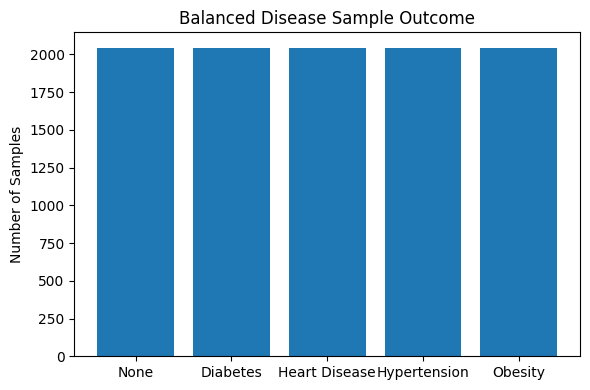

In [24]:
target = y_res.value_counts()
labels = ['None','Diabetes','Heart Disease','Hypertension','Obesity']
sizes = [target[0], target[1], target[2], target[3], target[4]]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes)
plt.title('Balanced Disease Sample Outcome')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [26]:
import os, joblib

os.makedirs('Models', exist_ok=True)
joblib.dump(scaler, 'Models/scaler.sav')

['Models/scaler.sav']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,        
    max_depth=100,            
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='macro')

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       608
           1       0.94      0.86      0.90       594
           2       0.96      0.89      0.92       626
           3       0.61      0.81      0.69       628
           4       0.98      0.96      0.97       609

    accuracy                           0.84      3065
   macro avg       0.86      0.84      0.85      3065
weighted avg       0.86      0.84      0.85      3065



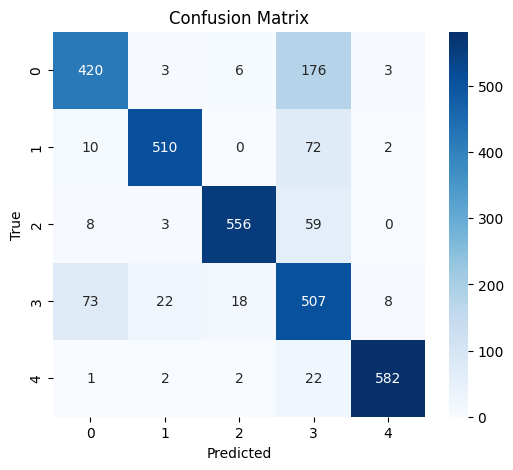

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    max_depth=1000,            
    random_state=42
)


dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='macro')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       608
           1       0.80      0.89      0.84       594
           2       0.81      0.91      0.86       626
           3       0.64      0.41      0.50       628
           4       0.84      0.96      0.89       609

    accuracy                           0.78      3065
   macro avg       0.77      0.78      0.77      3065
weighted avg       0.77      0.78      0.77      3065



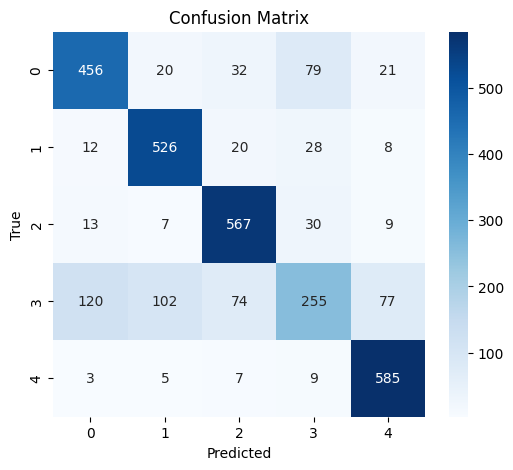

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100, C=0.1, random_state=42)

lr.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [38]:
y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

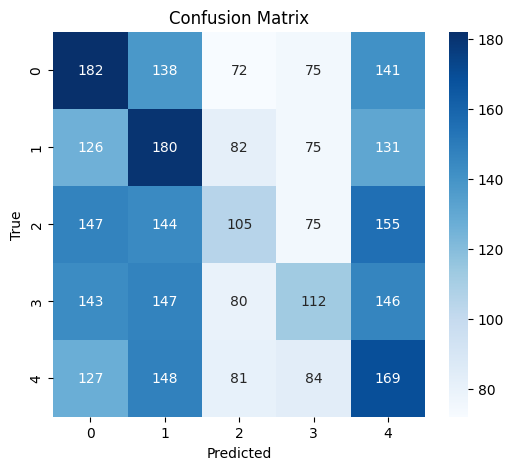

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.30      0.27       608
           1       0.24      0.30      0.27       594
           2       0.25      0.17      0.20       626
           3       0.27      0.18      0.21       628
           4       0.23      0.28      0.25       609

    accuracy                           0.24      3065
   macro avg       0.25      0.25      0.24      3065
weighted avg       0.25      0.24      0.24      3065



In [41]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# SVM

In [42]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

svm = make_pipeline(
    RBFSampler(gamma=0.1, n_components=500),
    LinearSVC(max_iter=100)
)

In [43]:
svm.fit(X_train, y_train)

Pipeline(steps=[('rbfsampler', RBFSampler(gamma=0.1, n_components=500)),
                ('linearsvc', LinearSVC(max_iter=100))])

In [44]:
y_pred    = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')

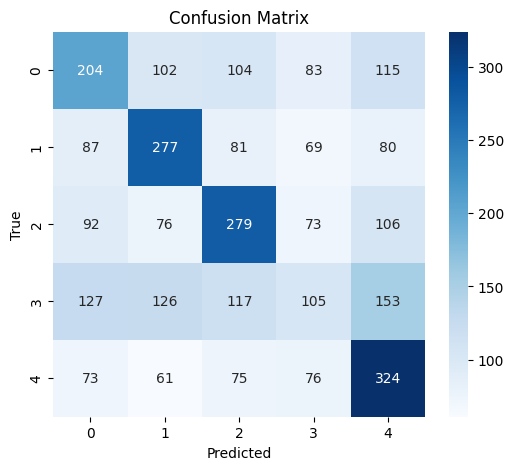

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.34      0.34       608
           1       0.43      0.47      0.45       594
           2       0.43      0.45      0.44       626
           3       0.26      0.17      0.20       628
           4       0.42      0.53      0.47       609

    accuracy                           0.39      3065
   macro avg       0.38      0.39      0.38      3065
weighted avg       0.38      0.39      0.38      3065



In [47]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# MLP

In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [49]:
y_pred    = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')

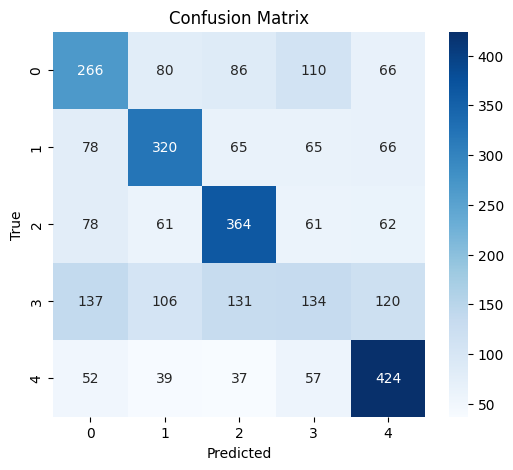

In [50]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       608
           1       0.53      0.54      0.53       594
           2       0.53      0.58      0.56       626
           3       0.31      0.21      0.25       628
           4       0.57      0.70      0.63       609

    accuracy                           0.49      3065
   macro avg       0.48      0.49      0.48      3065
weighted avg       0.48      0.49      0.48      3065



In [52]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# XGBoost

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

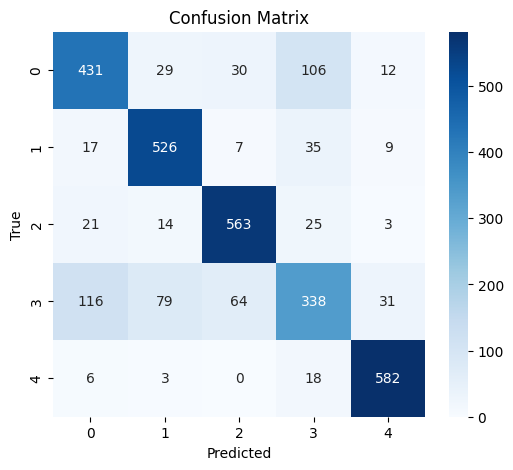

In [54]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       608
           1       0.81      0.89      0.84       594
           2       0.85      0.90      0.87       626
           3       0.65      0.54      0.59       628
           4       0.91      0.96      0.93       609

    accuracy                           0.80      3065
   macro avg       0.79      0.80      0.79      3065
weighted avg       0.79      0.80      0.79      3065



In [56]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Ensemble

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier

In [58]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF score:", grid_rf.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best RF params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best RF score: 0.7050340733814556


In [59]:
best_rf = grid_rf.best_estimator_

In [60]:
brf = BaggingClassifier(
    base_estimator=best_rf,
    random_state=42,
    n_jobs=-1
)

In [61]:
ext = VotingClassifier(
    estimators=[('RF', best_rf), ('BagRF', brf)],
    voting='soft'
)

In [62]:
ext.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('BagRF',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                                                      min_samples_split=5,
                                                                                      n_estimators=300,
                                                                                      n_jobs=-1,
                                                                                      random_state=42),
                                                n_j

In [63]:
y_pred = ext.predict(X_test)

In [64]:
ext_acc = accuracy_score(y_pred, y_test)
ext_prec = precision_score(y_pred, y_test,average='weighted')
ext_rec = recall_score(y_pred, y_test,average='weighted')
ext_f1 = f1_score(y_pred, y_test,average='macro')

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       608
           1       0.94      0.86      0.90       594
           2       0.95      0.89      0.92       626
           3       0.62      0.78      0.69       628
           4       0.97      0.96      0.96       609

    accuracy                           0.84      3065
   macro avg       0.85      0.84      0.84      3065
weighted avg       0.85      0.84      0.84      3065



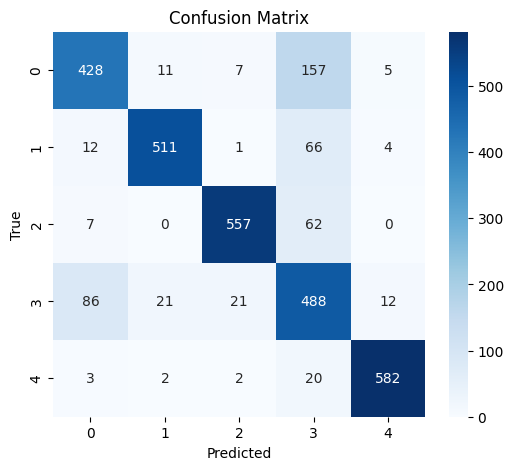

In [66]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [67]:
storeResults('Ensemble Model',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [68]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Macro F1 score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [69]:
result

,ML Model,Accuracy,Macro F1 score,Recall,Precision
0,Random Forest,0.840,0.846,0.840,0.841
1,DecisionTree,0.779,0.767,0.779,0.818
2,Logistic Regression,0.244,0.248,0.244,0.260
3,SVM,0.388,0.398,0.388,0.414
4,MLP,0.492,0.503,0.492,0.521
5,XGBoost,0.796,0.801,0.796,0.810
6,Ensemble Model,0.837,0.842,0.837,0.836


# Graph

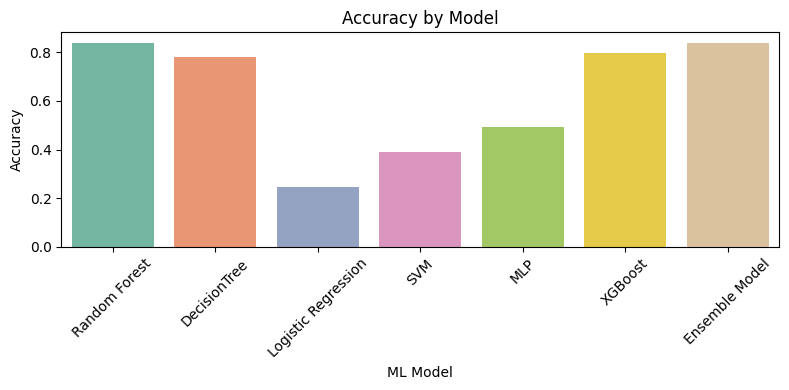

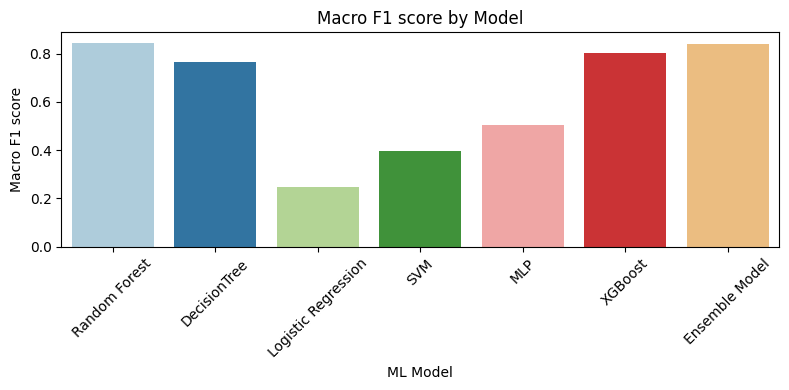

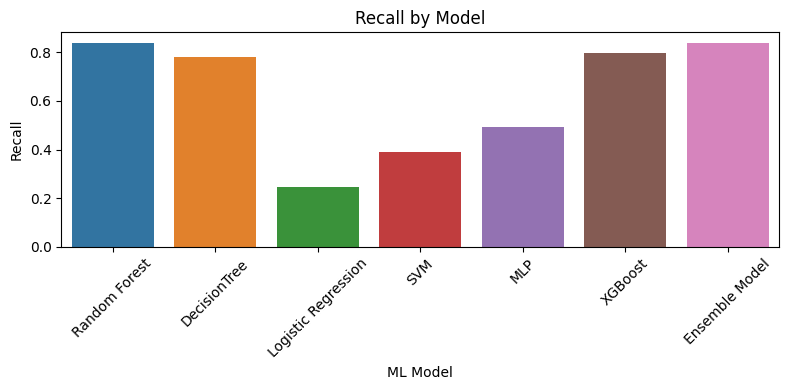

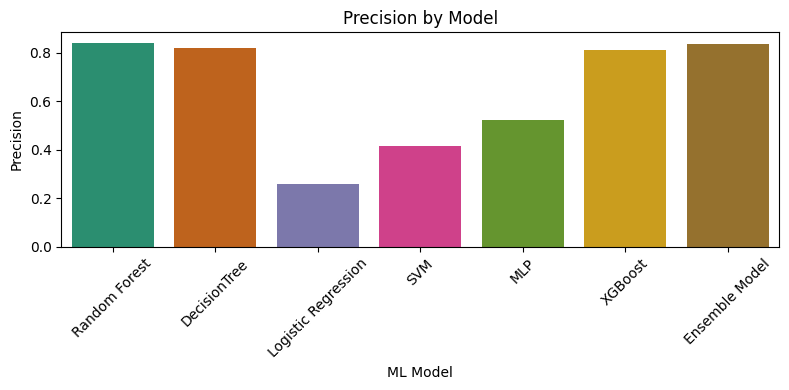

In [71]:
palettes = ['Set2', 'Paired', 'tab10', 'Dark2']

import matplotlib.pyplot as plt
import seaborn as sns

for metric, pal in zip(['Accuracy','Macro F1 score','Recall','Precision'], palettes):
    plt.figure(figsize=(8, 4))
    sns.barplot(data=result, x='ML Model', y=metric, palette=sns.color_palette(pal))
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Models

In [78]:
import joblib

filename = 'Models/model.sav'
joblib.dump(ext, filename)

['Models/model.sav']

In [79]:
filename = 'Models/model_rf.sav'
joblib.dump(rf, filename)

['Models/model_rf.sav']

In [2]:
import joblib

joblib.load('Models/model.sav')

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('BagRF',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                                                      min_samples_split=5,
                                                                                      n_estimators=300,
                                                                                      n_jobs=-1,
                                                                                      random_state=42),
                                                n_j